In [2]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = '/Users/pramnara/Downloads/Salary_dataset.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset preview:")
print(df.head())

# Perform basic statistical analysis
print("\nDataset statistics:")
print(df.describe())


Dataset preview:
   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0

Dataset statistics:
       Unnamed: 0  YearsExperience         Salary
count   30.000000        30.000000      30.000000
mean    14.500000         5.413333   76004.000000
std      8.803408         2.837888   27414.429785
min      0.000000         1.200000   37732.000000
25%      7.250000         3.300000   56721.750000
50%     14.500000         4.800000   65238.000000
75%     21.750000         7.800000  100545.750000
max     29.000000        10.600000  122392.000000


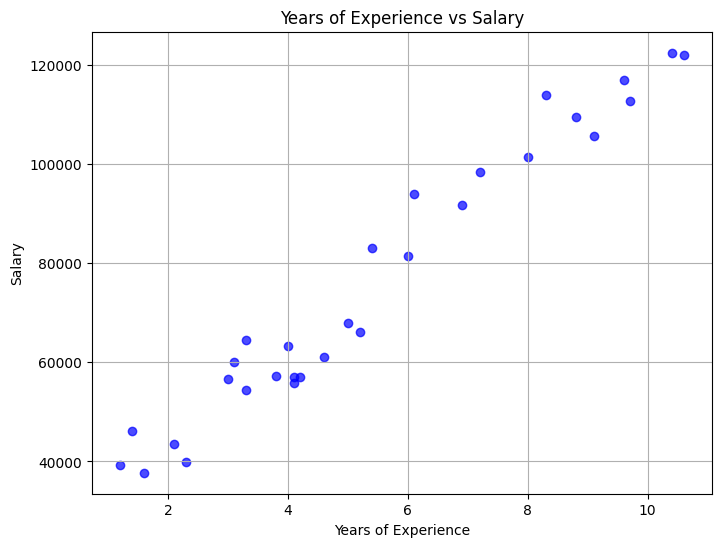

In [5]:
import matplotlib.pyplot as plt

# Scatter plot to visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(df['YearsExperience'], df['Salary'], color='blue', alpha=0.7)
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()


Epoch 100: Loss = 174981289.7261
Epoch 200: Loss = 174981054.4206
Epoch 300: Loss = 174981054.4205
Epoch 400: Loss = 174981054.4205
Epoch 500: Loss = 174981054.4205
Epoch 600: Loss = 174981054.4205
Epoch 700: Loss = 174981054.4205
Epoch 800: Loss = 174981054.4205
Epoch 900: Loss = 174981054.4205
Epoch 1000: Loss = 174981054.4205


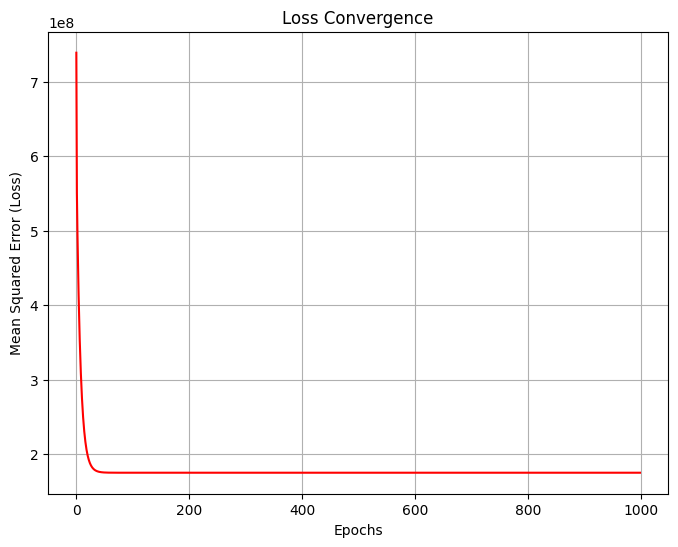

TypeError: unsupported format string passed to numpy.ndarray.__format__

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split

# Extract feature (X) and label (Y)
X = df['YearsExperience'].values.reshape(-1, 1)
Y = df['Salary'].values

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize weights, bias, and hyperparameters
weight = 0.0
bias = 0.0
learning_rate = 0.01
epochs = 1000

# Define a function for calculating Mean Squared Error
def calculate_loss(X, Y, weight, bias):
    predictions = weight * X + bias
    errors = Y - predictions
    mse = np.mean(errors ** 2)
    return mse

# Gradient Descent Training
losses = []
for epoch in range(epochs):
    # Predictions
    predictions = weight * X_train + bias

    # Calculate gradients
    error = Y_train - predictions
    weight_gradient = -(2 / len(X_train)) * np.dot(X_train.T, error)
    bias_gradient = -(2 / len(X_train)) * np.sum(error)

    # Update weights and bias
    weight -= learning_rate * weight_gradient
    bias -= learning_rate * bias_gradient

    # Calculate and store loss
    loss = calculate_loss(X_train, Y_train, weight, bias)
    losses.append(loss)

    # Print progress every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}: Loss = {loss:.4f}")

# Visualize Loss Convergence
plt.figure(figsize=(8, 6))
plt.plot(range(epochs), losses, color='red')
plt.title('Loss Convergence')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (Loss)')
plt.grid(True)
plt.show()

# Final weight and bias
print(f"Trained weight: {weight:.4f}")
print(f"Trained bias: {bias:.4f}")
